In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.pyplot import savefig

### Makes World Map
basemap = gpd.read_file('../basemaps/ne_110m_admin_0_countries.shp').set_index('ADMIN')
world = gpd.read_file('../basemaps/ne_10m_admin_0_countries_lakes.shp').set_index('NAME_EN')

# A map of all the books Tabatha has read

To be used at https://bookmarked.substack.com/

## Colours
The Bookmarked color scheme:
* Yellow = `#F2CD30` 
    * Light yellow = `#FFE781`
* Pink =  `#E58CB0`
    * Light pink = `#F1B6CE` for borders
* Alternate colors from [paletton](http://paletton.com/#uid=31m0u0kpEunfRGhl0xKtYq8vVkD)
* All other colours from [CSS Colors](https://www.quackit.com/css/css_color_codes.cfm)

## Projection

There is still debate about projection, 
* https://map-projections.net/imglist.php 
* https://residentmario.github.io/geoplot/api_reference.html 
are useful resources to help with this

In [2]:
countries_read=[
    #insert the countries you've read here:
    'Japan',
    'Argentina',
    'Antigua and Barbuda',
    'South Korea',
    'Netherlands',
    'France',
    'Norway',
    'Ireland',
    'Sweden',
    'Egypt',
    'Nigeria',
    'Indonesia',
    'Uganda',
    'India',
    'Mexico',
    'Zimbabwe',
    'Poland',
    'Iceland',
    'Oman',
    'Vietnam',
    'Equatorial Guinea',
    'Cameroon',
    'Turkey',
    'Morocco',
    'Russia',
    'People\'s Republic of China',
    ]

# Goes through list of countries you've read and turns it into a map
world['Read']=False
for country in countries_read:
    world.at[country, 'Read'] = True    
read_countries = world[world['Read']==True]  

read_country_points = read_countries.copy(deep=True)
read_country_points['geometry'] = read_country_points['geometry'].centroid
read_country_points.dropna(axis=0, subset=['geometry'], inplace=True)
for country in read_country_points.index:
    if country in basemap.index:
        read_country_points.drop(country, inplace=True)
        read_countries.at[country,'geometry']=basemap.loc[country].geometry

/Users/allisom1/anaconda3/envs/mapenv/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



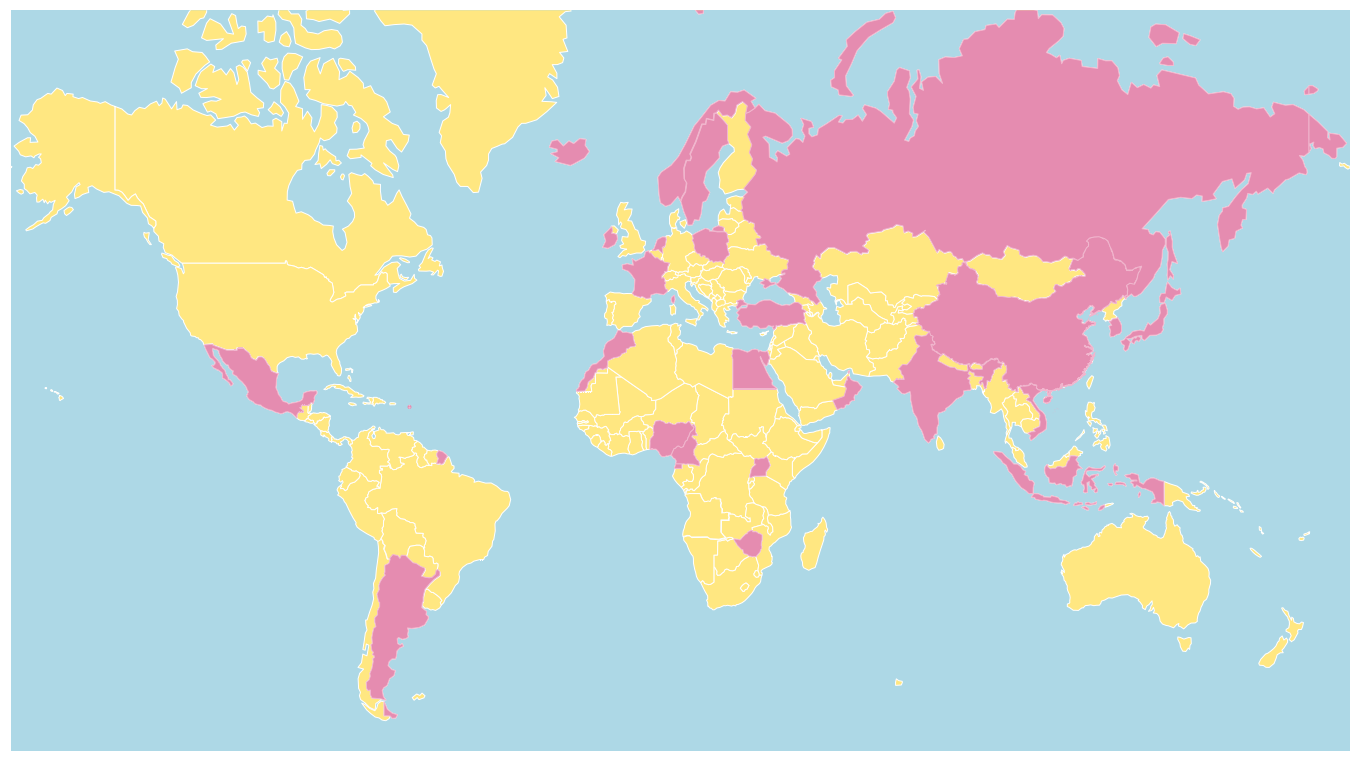

In [5]:
######
map_kwargs = {                                           # sets up projection and plot area, 
    'projection': gcrs.Mercator(central_longitude=11),   # buggy as hell, there is no logic as
    'extent':(-180, -60, 120, 77),                       # to why these numbers work but they do
}                                                        # so... uh... ¯\_(ツ)_/¯



ax = gplt.polyplot(basemap,
                   figsize=(24,24),
                   facecolor='#FFE781',           # color of the unread countries
                   edgecolor='white',             # border colors
                   linewidth=1,
                   zorder=1,
                   **map_kwargs,
                  )

read = gplt.polyplot(read_countries,
                     ax=ax,
                     facecolor='#E58CB0',          # color of the read countries
                     edgecolor='#F1B6CE',
                     zorder=10,
                     **map_kwargs,
                    )

read_small = gplt.pointplot(read_country_points,   # dots for countries too small to show up
                            ax=ax,
                            color='#E58CB0',
                            marker="o",
                            s=3,
                            zorder=5,
                            **map_kwargs
                           )


bg_color='lightblue'                           # colors in the "sea"
ax.patch.set_facecolor(bg_color)

savefig('../output/book-map.png',              # filename
        bbox_inches = 'tight', 
        pad_inches = 0,
       facecolor=bg_color)

In [4]:
for country in sorted(world.index):
    print(country)

Afghanistan
Akrotiri
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Ashmore and Cartier Islands
Australia
Australian Indian Ocean Territories
Austria
Azerbaijan
Bahrain
Baikonur
Bajo Nuevo Bank
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Indian Ocean Territory
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
Clipperton Island
Colombia
Comoros
Cook Islands
Coral Sea Islands
Costa Rica
Croatia
Cuba
Curaçao
Cyprus
Czech Republic
Democratic Republic of the Congo
Denmark
Dhekelia Cantonment
Djibouti
Dominica
Dominican Republic
East Timor
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands
Faroe Islands
Federated States of Micronesia
Fiji
Finland
France
French Polynesia
French Southern and Antarctic Lands
Gabon
Georgia
Germany